In [1]:
pip install pandas numpy scikit-learn matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
dataset = pd.read_csv('Position_Salaries.csv')
print(dataset.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler
X = dataset.iloc[:, 1:2].values  
y = dataset.iloc[:, 2].values 
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(X, y)

/opt/anaconda/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

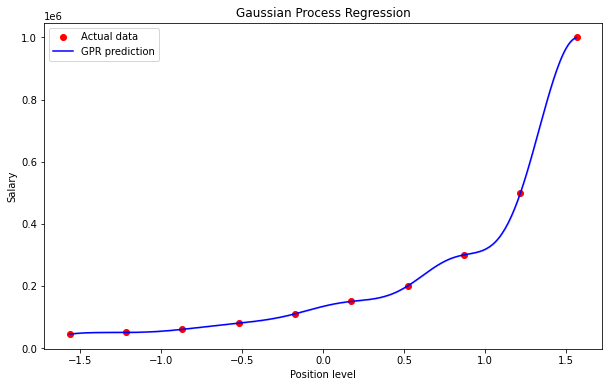

In [5]:
import matplotlib.pyplot as plt
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
# Predict using the Gaussian Process Regressor
y_pred, sigma = gpr.predict(X_grid, return_std=True)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X_grid, y_pred, color='blue', label='GPR prediction')
plt.fill_between(X_grid.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, color='blue')
plt.title('Gaussian Process Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()


#3 Dbclanclustering

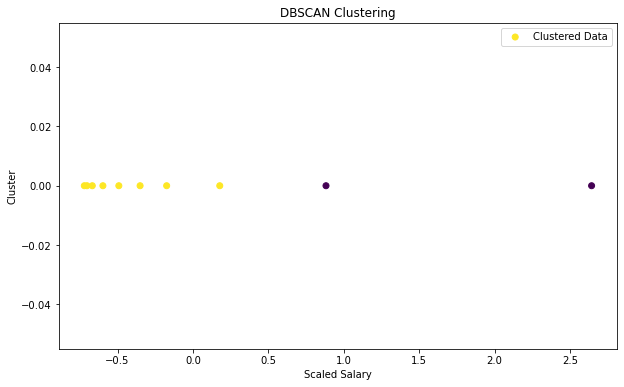

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 2:3].values  # Salary
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X, np.zeros_like(X), c=y_dbscan, cmap='viridis', label='Clustered Data')
plt.title('DBSCAN Clustering')
plt.xlabel('Scaled Salary')
plt.ylabel('Cluster')
plt.legend()
plt.show()

#4 Ridge Regression

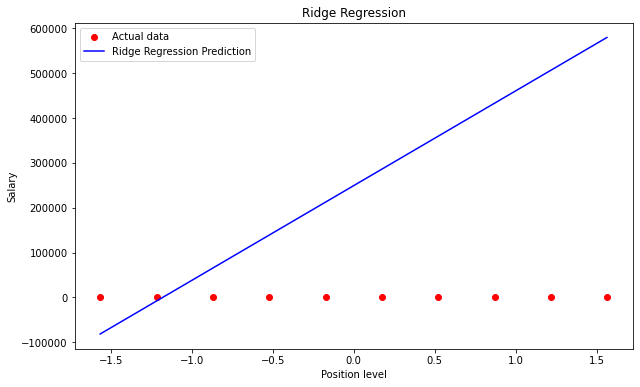

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values  # Position (as a feature)
y = dataset.iloc[:, 2].values    # Salary (as the target variable)
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create the Ridge Regression model with a specific alpha
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X, y)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
y_pred = ridge_regressor.predict(X_grid)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X_grid, y_pred, color='blue', label='Ridge Regression Prediction')
plt.title('Ridge Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()


#lasso Regression

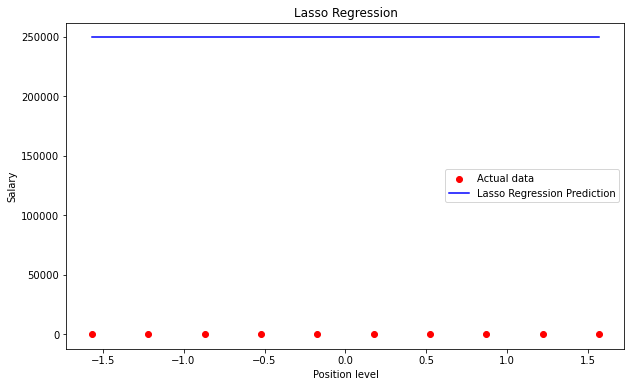

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
dataset = pd.read_csv('Position_Salaries.csv')

X = dataset.iloc[:, 1:2].values  # Position (as a feature)
y = dataset.iloc[:, 2].values    # Salary (as the target variable)

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

lasso_regressor = Lasso(alpha=1.0)
lasso_regressor.fit(X, y)

# Define a range of values for X
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

# Predict using the Lasso Regression model
y_pred = lasso_regressor.predict(X_grid)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X_grid, y_pred, color='blue', label='Lasso Regression Prediction')
plt.title('Lasso Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()


#7 Ordinary Least Square Regression

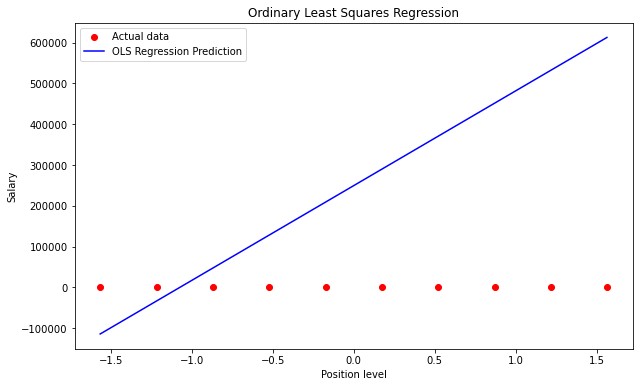

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

dataset = pd.read_csv('Position_Salaries.csv')

X = dataset.iloc[:, 1:2].values  # Position (as a feature)
y = dataset.iloc[:, 2].values    # Salary (as the target variable)

# Feature scaling (optional but useful for better numerical stability)
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# Target variable scaling (optional)
sc_y = StandardScaler()
y = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create the OLS Regression model
ols_regressor = LinearRegression()

# Fit the model
ols_regressor.fit(X, y)

# Define a range of values for X
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

# Predict using the OLS Regression model
y_pred = ols_regressor.predict(X_grid)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X_grid, y_pred, color='blue', label='OLS Regression Prediction')
plt.title('Ordinary Least Squares Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()


#8 Divisive Clustering

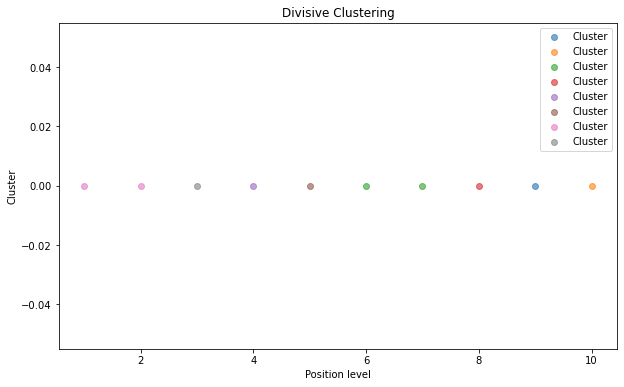

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

dataset = pd.read_csv('Position_Salaries.csv')

X = dataset.iloc[:, 1:2].values  # Position (as a feature)

# Define the Divisive Clustering function
def divisive_clustering(X, num_clusters=2, depth=0, max_depth=3):
    if depth >= max_depth:
        return [X]
    
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    clusters = []
    for cluster_index in range(num_clusters):
        cluster_points = X[labels == cluster_index]
        clusters.extend(divisive_clustering(cluster_points, num_clusters=num_clusters, depth=depth+1, max_depth=max_depth))
    
    return clusters

# Perform Divisive Clustering
max_depth = 3  # Set maximum depth for the division
clusters = divisive_clustering(X, num_clusters=2, max_depth=max_depth)

plt.figure(figsize=(10, 6))
for cluster in clusters:
    plt.scatter(cluster, np.zeros_like(cluster), label='Cluster', alpha=0.6)
plt.title('Divisive Clustering')
plt.xlabel('Position level')
plt.ylabel('Cluster')
plt.legend()
plt.show()


#9 Gradient Boosting

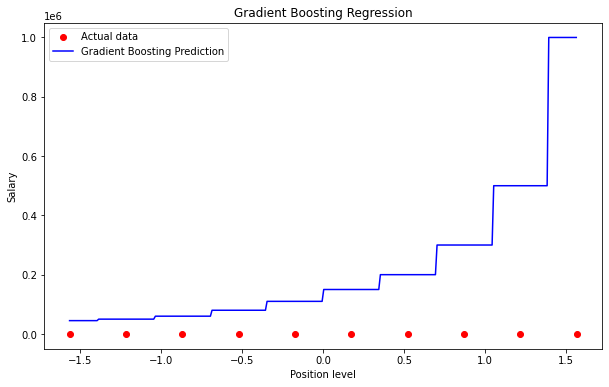

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

dataset = pd.read_csv('Position_Salaries.csv')

# Extract features and target variable
X = dataset.iloc[:, 1:2].values  # Position (as a feature)
y = dataset.iloc[:, 2].values    # Salary (as the target variable)

# Scale the features
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# Target variable scaling (optional)
sc_y = StandardScaler()
y = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create the Gradient Boosting model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

# Fit the model
gb_regressor.fit(X, y)

# Define a range of values for X
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

# Predict using the Gradient Boosting model
y_pred = gb_regressor.predict(X_grid)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X_grid, y_pred, color='blue', label='Gradient Boosting Prediction')
plt.title('Gradient Boosting Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()


#10 FP - Growth algorithm

In [19]:
pip install pandas numpy mlxtend


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.4 MB 1.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd

# Create a synthetic transactional dataset
data = {
    'TransactionID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Items': [
        ['Milk', 'Bread', 'Butter'],
        ['Milk', 'Diaper', 'Beer', 'Eggs'],
        ['Bread', 'Butter', 'Diaper'],
        ['Milk', 'Bread', 'Butter', 'Diaper'],
        ['Milk', 'Diaper', 'Beer'],
        ['Bread', 'Butter'],
        ['Milk', 'Bread', 'Diaper', 'Butter'],
        ['Milk', 'Bread'],
        ['Milk', 'Diaper'],
        ['Diaper', 'Beer']
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


   TransactionID                          Items
0              1          [Milk, Bread, Butter]
1              2     [Milk, Diaper, Beer, Eggs]
2              3        [Bread, Butter, Diaper]
3              4  [Milk, Bread, Butter, Diaper]
4              5           [Milk, Diaper, Beer]
5              6                [Bread, Butter]
6              7  [Milk, Bread, Diaper, Butter]
7              8                  [Milk, Bread]
8              9                 [Milk, Diaper]
9             10                 [Diaper, Beer]


    support                 itemsets
0       0.7                   (Milk)
1       0.6                  (Bread)
2       0.5                 (Butter)
3       0.7                 (Diaper)
4       0.3                   (Beer)
5       0.4            (Milk, Bread)
6       0.3          (Diaper, Bread)
7       0.5          (Bread, Butter)
8       0.3           (Milk, Butter)
9       0.3         (Diaper, Butter)
10      0.3    (Milk, Bread, Butter)
11      0.3  (Diaper, Bread, Butter)
12      0.5           (Milk, Diaper)
13      0.3           (Beer, Diaper)


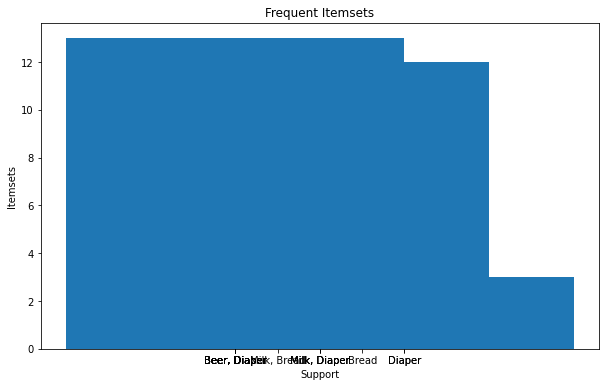

In [21]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
import matplotlib.pyplot as plt

# Prepare data for FP-Growth
te = TransactionEncoder()
te_ary = te.fit(df['Items']).transform(df['Items'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-Growth
frequent_itemsets = fpgrowth(df_encoded, min_support=0.3, use_colnames=True)

print(frequent_itemsets)

# Plot frequent itemsets
plt.figure(figsize=(10, 6))
plt.bar(frequent_itemsets['support'], height=range(len(frequent_itemsets)), tick_label=frequent_itemsets['itemsets'].apply(lambda x: ', '.join(x)))
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Frequent Itemsets')
plt.show()


#2 Principal Component Analysis

Explained variance ratio: [1.]


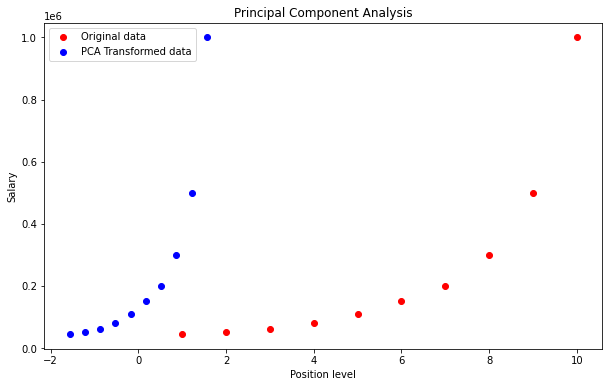

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('Position_Salaries.csv')

# Extract features and target variable
X = dataset.iloc[:, 1:2].values  # Position (as a feature)
y = dataset.iloc[:, 2].values    # Salary (as the target variable)

# Feature scaling
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

# Apply PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Original data')
plt.scatter(X_pca, y, color='blue', label='PCA Transformed data')
plt.title('Principal Component Analysis')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()


#6 Balance Iterative Reducing and Clustering using Hierarchies (BIRCH)

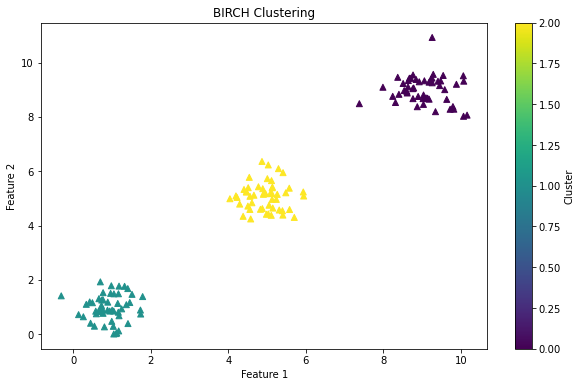

In [27]:
import pandas as pd
import numpy as np
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

# Create a synthetic dataset for clustering
np.random.seed(42)
X_synthetic = np.vstack([
    np.random.normal(loc=[1, 1], scale=0.5, size=(50, 2)),
    np.random.normal(loc=[5, 5], scale=0.5, size=(50, 2)),
    np.random.normal(loc=[9, 9], scale=0.5, size=(50, 2))
])

# Apply BIRCH clustering
birch_model = Birch(n_clusters=3)  # Number of clusters can be adjusted
birch_model.fit(X_synthetic)
clusters = birch_model.predict(X_synthetic)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_synthetic[:, 0], X_synthetic[:, 1], c=clusters, cmap='viridis', label='Clustered data',marker="^")
plt.title('BIRCH Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()
